In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')
session = Session(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [4]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER


In [5]:
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
engine.execute('SELECT * FROM measurements').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61),
 (11, 'USC00519397', '2010-01-14', 0.0, 66),
 (12, 'USC00519397', '2010-01-15', 0.0, 65),
 (13, 'USC00519397', '2010-01-16', 0.0, 68),
 (14, 'USC00519397', '2010-01-17', 0.0, 64),
 (15, 'USC00519397', '2010-01-18', 0.0, 72),
 (16, 'USC00519397', '2010-01-19', 0.0, 66),
 (17, 'USC00519397', '2010-01-20', 0.0, 66),
 (18, 'USC00519397', '2010-01-21', 0.0, 69),
 (19, 'USC00519397', '2010-01-22', 0.0, 67),
 (20, 'USC00519397', '2010-01-23', 0.0, 67),
 (21, 'USC00519397', '2010-01-24', 0.01, 71),
 (22, 'USC00519397', '2010-01-25', 0.0, 67),
 (23, 'USC00519

In [8]:
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [9]:
for row in session.query(Measurement, Measurement.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurements object at 0x10a541860>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x10a541278>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x10a541ac8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x10a541710>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x10e95b0b8>, 'USC00519397')


In [10]:
for row in session.query(Station, Station.elevation).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.stations object at 0x10e95b710>, 3.0)
(<sqlalchemy.ext.automap.stations object at 0x10e95bba8>, 14.6)
(<sqlalchemy.ext.automap.stations object at 0x10e95bc18>, 7.0)
(<sqlalchemy.ext.automap.stations object at 0x10e95bc88>, 11.9)
(<sqlalchemy.ext.automap.stations object at 0x10e95bcf8>, 306.6)


# Precipitation Analysis

In [11]:
query_results = session.query(Measurement.date,
                func.avg(Measurement.prcp).label('avg_precipitation')).filter(Measurement.date.between('2016-08-23', '2017-08-23')).group_by(Measurement.date).all()
#query_results

In [12]:
date = [row[0] for row in query_results]
avg_prcp = [row[1] for row in query_results]

In [13]:
df = pd.DataFrame(query_results, columns=['date', 'avg_prcp'])
#df = pd.read_sql(query_results.statement, session.bind)
df.set_index('date', inplace=True)
df.head()

,avg_prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


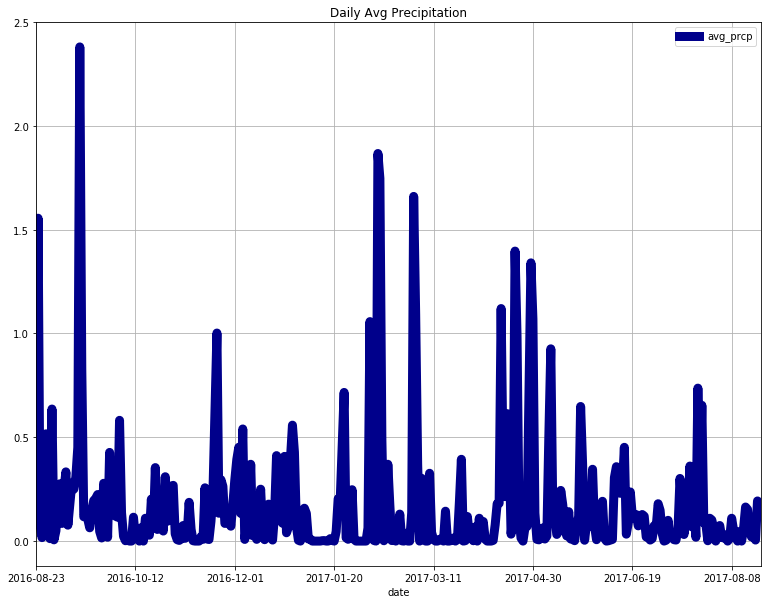

In [14]:
#df["date"]=pd.to_datetime(df["date"])
#df.plot(x= 'date', y= 'avg_prcp', figsize=(13,10), linewidth=5)
#plt.ylabel('Avg Precipitation', fontsize = 10)
#plt.xlabel('Date', fontsize = 12)
#plt.title("Daily Avg Precipitation", fontsize = 15)
df.plot(title="Daily Avg Precipitation", color="darkblue", figsize=(13,10), linewidth=9)
plt.grid()
plt.show()

In [15]:
round(df.describe(),2)

,avg_prcp
count,366.00
mean,0.17
std,0.30
min,0.00
25%,0.01
50%,0.07
75%,0.19
max,2.38


# Station Analysis

In [16]:
total_stations = session.query(Station.station).distinct().count()
stations = session.query(Station).group_by(Station.name).count()
print(total_stations)
print(stations)

9
9


In [17]:
station_activity = session.query(Measurement.station, func.count(Measurement.station).label('Activity_Count'))\
                .group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
station_activity[:]

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [18]:
station_activity[0]

('USC00519281', 2772)

In [19]:
tobs = session.query(Measurement.date, func.avg(Measurement.tobs).label('Daily_Avg_Temp'))\
            .filter(Measurement.date.between('2016-08-23', '2017-08-23'), Measurement.station == 'USC00519281')\
            .group_by(Measurement.date)
tobs[:]

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [20]:
tobs_df = pd.read_sql(tobs.statement, session.bind)
tobs_df.head()

,date,Daily_Avg_Temp
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [21]:
tobs_df["Temp_Bin"] = pd.cut(tobs_df["Daily_Avg_Temp"], bins=12)
tobs_df.head()

,date,Daily_Avg_Temp,Temp_Bin
0,2016-08-23,77.0,"(75.0, 77.0]"
1,2016-08-24,77.0,"(75.0, 77.0]"
2,2016-08-25,80.0,"(79.0, 81.0]"
3,2016-08-26,80.0,"(79.0, 81.0]"
4,2016-08-27,75.0,"(73.0, 75.0]"


In [22]:
tobs_df['Temp_Bin'].value_counts()

(73.0, 75.0]      72
(75.0, 77.0]      64
(77.0, 79.0]      40
(71.0, 73.0]      40
(69.0, 71.0]      40
(67.0, 69.0]      31
(65.0, 67.0]      20
(79.0, 81.0]      15
(63.0, 65.0]      10
(61.0, 63.0]      10
(58.976, 61.0]     6
(81.0, 83.0]       4
Name: Temp_Bin, dtype: int64

In [23]:
tobs_df.groupby('Temp_Bin').size().reset_index(name="Frequency")

,Temp_Bin,Frequency
0,"(58.976, 61.0]",6
1,"(61.0, 63.0]",10
2,"(63.0, 65.0]",10
3,"(65.0, 67.0]",20
4,"(67.0, 69.0]",31
5,"(69.0, 71.0]",40
6,"(71.0, 73.0]",40
7,"(73.0, 75.0]",72
8,"(75.0, 77.0]",64
9,"(77.0, 79.0]",40


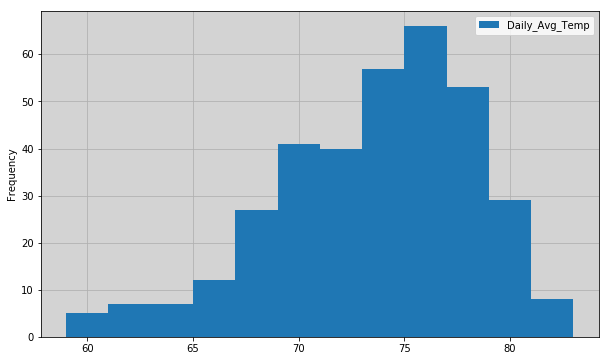

In [24]:
tobs_df.plot.hist(x=tobs_df['Daily_Avg_Temp'], bins=12, alpha=1, zorder=3, figsize=(10,6))
plt.grid(zorder=0)
ax = plt.gca()
ax.set_facecolor('lightgrey')
plt.show()

# Temperature Analysis

In [25]:
start_date = '2017-01-01'
end_date = '2017-01-14'
sel = [func.min(Measurement.tobs),
      func.avg(Measurement.tobs),
      func.max(Measurement.tobs)]
calc_temps = session.query(*sel).\
    filter(Measurement.date.between(start_date, end_date))
calc_temps

In [26]:
calc_temps_df = pd.read_sql(calc_temps.statement, session.bind)
calc_temps_df['yerr'] = (calc_temps_df['max_1'] - calc_temps_df['min_1'])/2
calc_temps_df

,min_1,avg_1,max_1,yerr
0,60,68.226667,78,9.0


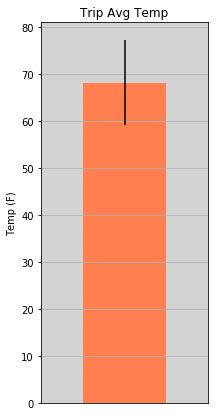

In [27]:
calc_temps_df.plot.bar(title="Trip Avg Temp", y='avg_1', yerr='yerr', figsize=(3,7), color='coral')
ax = plt.gca()
ax.set_facecolor('lightgrey')
ax.legend_.remove()
ax.yaxis.grid(True)
ax.ylabel = ('Temp (F)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
ax.set_ylabel('Temp (F)')
plt.show()